# Building and Examining Tree Based Classifiers on Customer Segmentation Data

## ML Models used: Decision Tree, Random Forest

## Importing Libraries

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

Dataset link: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation

The dataset on kaggle is split into train and test in separate csv files. However, here we combine them into one csv file: _"trainandtest.csv"_ to utilise all datapoints and perform cross validation later using our ML Models for testing.

In [203]:
df = pd.read_csv(r"C:\Users\srish\ml girly\ML Proj 1\Customer Segmentation\Train.csv")

In [205]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [306]:
df.shape

(8068, 10)

In [395]:
# can do EDA

## Data Cleaning

In [208]:
df.duplicated().sum()
# 0 complete duplicates

0

In [210]:
df.duplicated(subset = 'ID').sum()
# 0 duplicates wrt Customer ID
# performing just another check

0

In [212]:
df.isna().sum()
# multiple NA values in multiple columns

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

### checking how features with missing values are distributed

Text(0.5, 1.0, 'Ever Married Distribution')

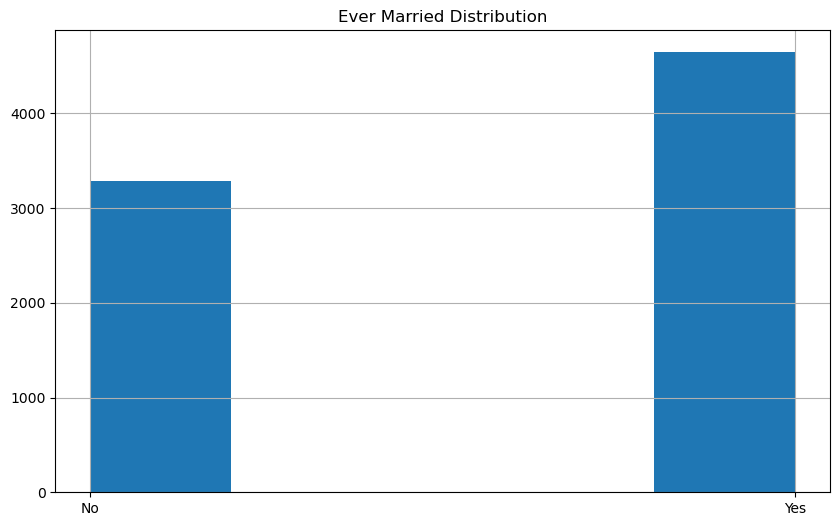

In [215]:
plt.figure(figsize=(10,6))
df['Ever_Married'].hist(bins=5)
plt.title('Ever Married Distribution')

Text(0.5, 1.0, 'Work Experience Distribution')

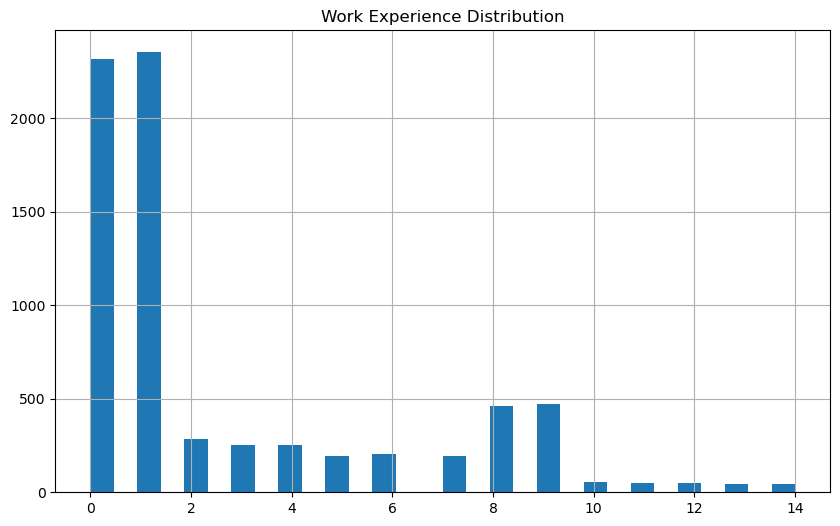

In [216]:
plt.figure(figsize=(10,6))
df['Work_Experience'].hist(bins=30)
plt.title('Work Experience Distribution')

In [218]:
#sns.histplot(data=df,x='Work_Experience')
# majority datapoints with <=1 year of Work Experience

Text(0.5, 1.0, 'Profession Distribution')

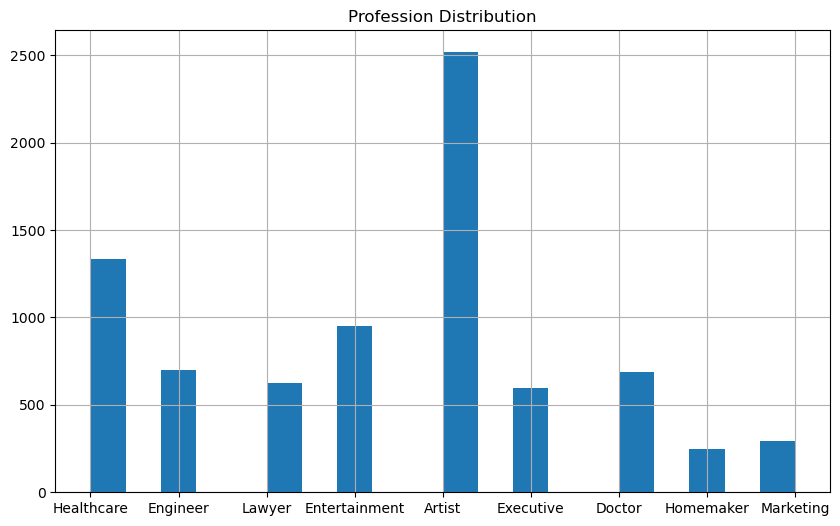

In [219]:
plt.figure(figsize=(10,6))
df['Profession'].hist(bins=20)
plt.title('Profession Distribution')

Text(0.5, 1.0, 'Graduated Distribution')

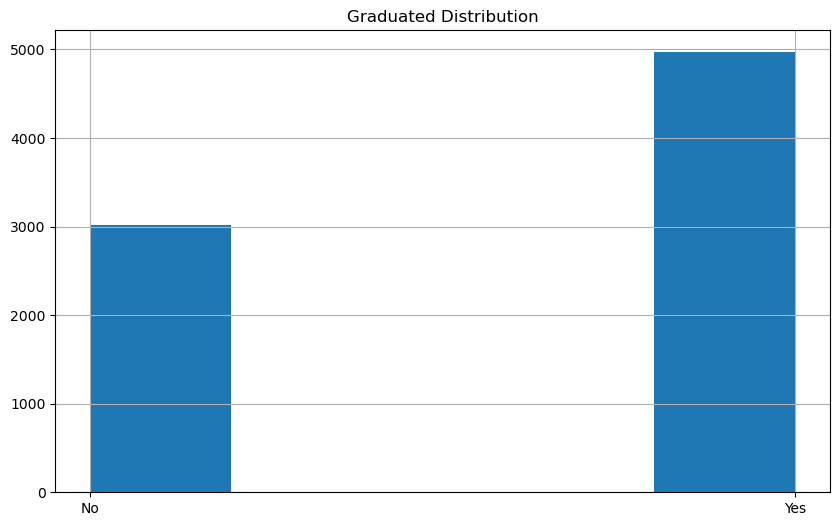

In [221]:
plt.figure(figsize=(10,6))
df['Graduated'].hist(bins=5)
plt.title('Graduated Distribution')

Text(0.5, 1.0, 'Family Size Distribution')

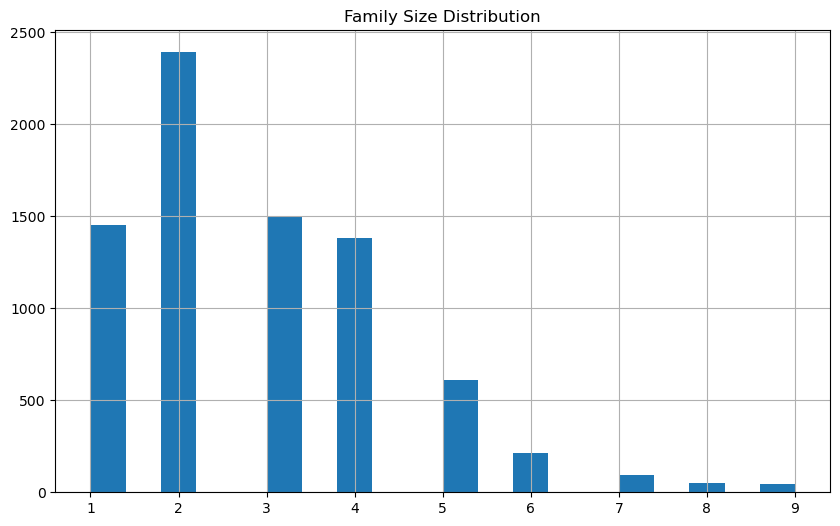

In [223]:
plt.figure(figsize=(10,6))
df['Family_Size'].hist(bins=20)
plt.title('Family Size Distribution')

Text(0.5, 1.0, 'Anonymous Variable Distribution')

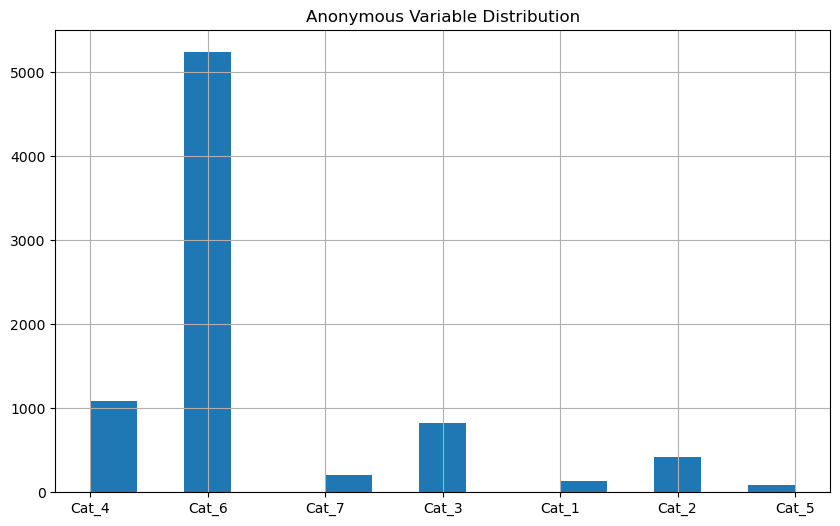

In [224]:
plt.figure(figsize=(10,6))
df['Var_1'].hist(bins=15)
plt.title('Anonymous Variable Distribution')

### we can impute missing observations via forward filling

In [287]:
# could have removed rows with NA values as well
df['Ever_Married'] = df['Ever_Married'].ffill()
df['Family_Size'] = df['Family_Size'].ffill()
df['Graduated'] = df['Graduated'].ffill()
df['Profession'] = df['Profession'].ffill()
df['Work_Experience'] = df['Work_Experience'].ffill()
df['Var_1'] = df['Var_1'].ffill()

In [289]:
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

## Data Preprocessing

Most of our features are categorical. However, not all machine learning algorithms can handle categorical data as inputs. Thus, we convert them into numerical inputs.

In [325]:
categorical_features = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1','Segmentation']

In [327]:
from sklearn.preprocessing import LabelEncoder 

In [329]:
for i in categorical_features:
    le = LabelEncoder()
    y = le.fit_transform(df[i])
    df[i] = y

In [331]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
1,0,1,38,1,2,1.0,0,3.0,3,0
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
4,0,1,40,1,3,0.0,1,6.0,5,0


In [245]:
df.drop('ID', axis = 1, inplace = True)
# we drop ID column since it does not help in model building, since it is unique for each Customer

In [247]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,D
1,0,1,38,1,2,1.0,0,3.0,3,A
2,0,1,67,1,2,1.0,2,1.0,5,B
3,1,1,67,1,7,0.0,1,2.0,5,B
4,0,1,40,1,3,0.0,1,6.0,5,A


In [271]:
df.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,0.547471,0.585275,43.466906,0.622335,2.792390,2.618741,1.359941,2.846678,4.138572
std,0.497772,0.492705,16.711696,0.484833,2.540883,3.394284,0.848418,1.530377,1.425436
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,1.000000,1.000000,40.000000,1.000000,3.000000,1.000000,2.000000,3.000000,5.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,6.000000


### Splitting the dataset

Instead of simply splitting the dataset into train and test, we use the cross-validation approach here

In [275]:
from sklearn.model_selection import KFold

In [291]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1234) #5 fold cross validation

In [293]:
X = df.drop("Segmentation",axis = 1)
y = df["Segmentation"]

#splitting features (X: independent variables) and target (y: study variable)

## Training the models

In [355]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [357]:
dtc = DecisionTreeClassifier(max_depth = 5)
#setting a random max depth
rf = RandomForestClassifier()

## Examining the models

In [360]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score
precision_scorer = make_scorer(precision_score, average="macro", zero_division=0)
recall_scorer = make_scorer(recall_score, average="macro", zero_division=0)
#since y is multiclass

In [362]:
dtc_scores = cross_val_score(dtc, X, y, cv = kf, scoring = "accuracy")
dtc_pres = cross_val_score(dtc, X, y, cv = kf, scoring = precision_scorer)
dtc_recall = cross_val_score(dtc, X, y, cv = kf, scoring = recall_scorer)
(dtc_scores.mean(),dtc_pres.mean(),dtc_recall.mean())

(0.5200818012877095, 0.5036087442785434, 0.5088915117296694)

In [363]:
rf_scores = cross_val_score(rf, X, y, cv = kf, scoring = "accuracy")
rf_pres = cross_val_score(rf, X, y, cv = kf, scoring = precision_scorer)
rf_recall = cross_val_score(rf, X, y, cv = kf, scoring = recall_scorer)
(rf_scores.mean(),rf_pres.mean(),rf_recall.mean())

(0.49219215620296985, 0.4771253814507877, 0.48219460312046963)

#### We see that our Random Forest underperforms in comparison to a simple decision tree!

## Tuning hyperparameters: using Grid Search and Randomized Search

In [397]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [399]:
param_grid_dtc = {
    "max_depth": [None, 5, 10, 20],
    "max_features": [None,"sqrt", "log2"],
    "min_samples_split": [2, 5, 10],
}

grid_search_dtc = GridSearchCV(dtc, param_grid_dtc, cv = kf, scoring="accuracy")
grid_search_dtc.fit(X, y)
grid_search_dtc.best_params_

{'max_depth': 5, 'max_features': None, 'min_samples_split': 2}

In [401]:
#for Random Forest, Grid Search takes too long, hence performing Randomized Search
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "max_features": [None, "sqrt", "log2"],
    "min_samples_split": [2, 5, 10],
}

random_search = RandomizedSearchCV(rf, param_grid, cv = kf, scoring="accuracy")
random_search.fit(X, y)
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 10}

## Models using tuned hyperparameters

In [405]:
dtc_best = DecisionTreeClassifier(max_depth = 5, min_samples_split = 2)
rf_best = RandomForestClassifier(max_depth = 10, max_features = 'log2', min_samples_split = 2, n_estimators = 100)

In [407]:
dtc_best_scores = cross_val_score(dtc_best, X, y, cv = kf, scoring = "accuracy")
rf_best_scores = cross_val_score(rf_best, X, y, cv = kf, scoring = "accuracy")

dtc_best_scores.mean(), rf_best_scores.mean()

(0.5200818012877095, 0.5345814021914571)

Since our hyperparameters for the Decision Tree found via Grid Search are the same as the ones before, the accuracy of the model seems to be maximised at 52.00% (with the considered possible set of parameters in Grid Search).

The accuracy of the Random Forest sees an increase from 49% to 53.45%, performing slightly better than the simple Decision Tree.